In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
class Model():
    def __init__(self,
        beta = 0.6,
        alpha = 0.3,  
        delta = 1.0, 
        A = 1.0,     
        nk = 100,   
        kmax = 0.2,  
        kmin = 0.04, 
        maxit = 10000, 
        tol = 1e-5,
        ): 
        
        self.beta, self.alpha = beta, alpha 
        self.delta, self.nk = delta, nk 
        self.A = A
        self.kmax, self.kmin = kmax, kmin 
        self.maxit, self.tol = maxit, tol
        self.kgrid = np.linspace(kmin,kmax,nk)


it = 1 
dif1 = 1.0 
dif2 = 1.0 

m = Model()
vfcn = np.ones(m.nk)
pfcn = np.ones_like(vfcn)
Tvfcn = np.zeros_like(vfcn)
Tpfcn = np.zeros_like(vfcn)
vkp = np.empty((m.nk,m.nk))
v_conv = [] 
p_conv = [] 

In [46]:
util = np.ones((m.nk,m.nk))

for i in range(m.nk): #k
    for j in range(m.nk): #k'
        
        wealth = m.A * m.kgrid[i] ** m.alpha + (1.0-m.delta)*m.kgrid[i] #A k^\alpha
        cons = wealth - m.kgrid[j] # A k^\alpha - k'
        util[i,j] = np.log(cons) # log(A k^\alpha - k')

while (it<m.maxit) & (dif1>m.tol):

    for i in range(m.nk):
        
        vkp[i,:] = util[i,:] + m.beta*vfcn
        
        ploc = np.argmax(vkp[i,:])
        Tvfcn[i] = vkp[i,ploc]
        Tpfcn[i] = m.kgrid[ploc]
    
    dif1 = np.max(np.abs((Tvfcn-vfcn)/vfcn))
    dif2 = np.max(np.abs((Tpfcn-pfcn)/pfcn)) 
    
    vfcn = np.copy(Tvfcn)
    pfcn = np.copy(Tpfcn)

    print(f"iteration index: {it}, iteration diff of value: {dif1:.7f}")

    v_conv.append(dif1)
    p_conv.append(dif2)

    it += 1

iteration index: 1, iteration diff of value: 1.4766626
iteration index: 2, iteration diff of value: 2260.6118518
iteration index: 3, iteration diff of value: 0.6574210
iteration index: 4, iteration diff of value: 0.2396334
iteration index: 5, iteration diff of value: 0.1162168
iteration index: 6, iteration diff of value: 0.0625058
iteration index: 7, iteration diff of value: 0.0353028
iteration index: 8, iteration diff of value: 0.0204613
iteration index: 9, iteration diff of value: 0.0120306
iteration index: 10, iteration diff of value: 0.0071325
iteration index: 11, iteration diff of value: 0.0042492
iteration index: 12, iteration diff of value: 0.0025387
iteration index: 13, iteration diff of value: 0.0015194
iteration index: 14, iteration diff of value: 0.0009103
iteration index: 15, iteration diff of value: 0.0005457
iteration index: 16, iteration diff of value: 0.0003272
iteration index: 17, iteration diff of value: 0.0001963
iteration index: 18, iteration diff of value: 0.000117

In [47]:
print("-+- PARAMETER VALUES -+-")
print(f"beta={m.beta} alpha={m.alpha}, delta={m.delta}")
print(f"kmin={m.kmin}, kmax={m.kmax}, grid={m.nk}")

-+- PARAMETER VALUES -+-
beta=0.6 alpha=0.3, delta=1.0
kmin=0.04, kmax=0.2, grid=100


In [61]:
# True value function
AA = (1-m.beta)**(-1) * (np.log(1-m.alpha*m.beta) + ((m.alpha*m.beta)/(1-m.alpha*m.beta))*np.log(m.alpha*m.beta))
BB = m.alpha/(1-m.alpha*m.beta)


v_true = AA + BB  * np.log(m.kgrid)
p_true =  m.beta * m.alpha * (m.kgrid ** m.alpha)
#p_true =  m.beta * (m.kgrid ** m.alpha)

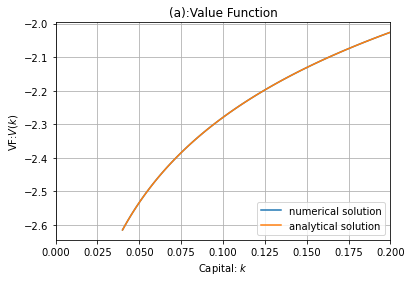

In [62]:
fig, ax = plt.subplots()
ax.plot(m.kgrid,vfcn,label="numerical solution")
ax.plot(m.kgrid,v_true,label="analytical solution")
ax.set(title="(a):Value Function",xlabel=r"Capital: $k$", ylabel=r"VF:$V(k)$",xlim=(0,m.kmax))
ax.legend(loc="lower right")
ax.grid()
plt.show()

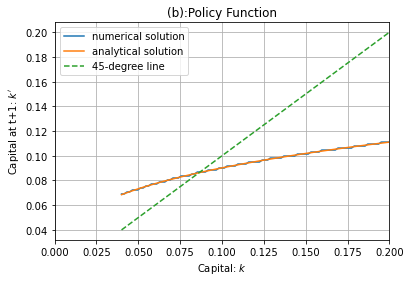

In [63]:
fig, ax = plt.subplots()
ax.plot(m.kgrid, pfcn, label="numerical solution")
ax.plot(m.kgrid, p_true, label="analytical solution")
ax.plot(m.kgrid, m.kgrid, ls="--", label="45-degree line")
ax.set(title="(b):Policy Function",xlabel=r"Capital: $k$", ylabel=r"Capital at t+1: $k'$",xlim=(0,m.kmax))
ax.legend(loc="upper left")
ax.grid()
plt.show()

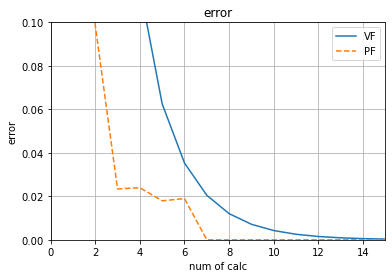

In [64]:
fig, ax = plt.subplots()
ax.plot(v_conv,label="VF")
ax.plot(p_conv,label="PF",ls="--")
ax.set(xlabel="num of calc", ylabel="error", title="error",xlim=(0,15),ylim=(0,0.1))
ax.grid()
ax.legend(loc="upper right")
plt.show()